<a href="https://colab.research.google.com/github/Mya-Miller/MachineLearningProject/blob/main/emnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### load library

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
from tensorflow import keras
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.losses import categorical_crossentropy
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

### Load dataset

In [3]:
train_data_path = 'emnist-letters-train.csv'
test_data_path = 'emnist-letters-test.csv'

In [4]:
train_data = pd.read_csv(train_data_path, header=None)

In [5]:
train_data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# The classes of this balanced dataset are as follows. Index into it based on class label
class_mapping = ' ABCDEFGHIJKLMNOPQRSTUVWXYZ'
# source data: https://arxiv.org/pdf/1702.05373.pdf

In [7]:
class_mapping[20]

'T'

In [8]:
train_data.shape

(88800, 785)

## Data is flipped

<function matplotlib.pyplot.show(close=None, block=None)>

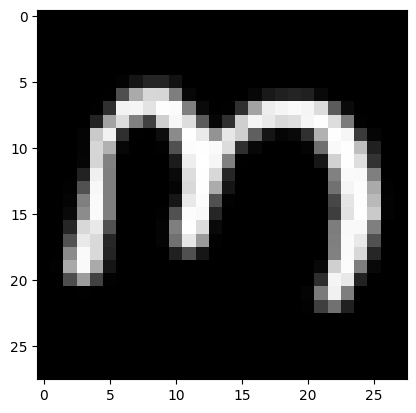

In [22]:
check = 782
check_image = train_data.iloc[check,1:].to_numpy()
pixels = check_image.reshape((28,28))
img1 = np.fliplr(pixels)
img1 = np.rot90(img1)
plt.imshow(img1, cmap = 'gray')
plt.show


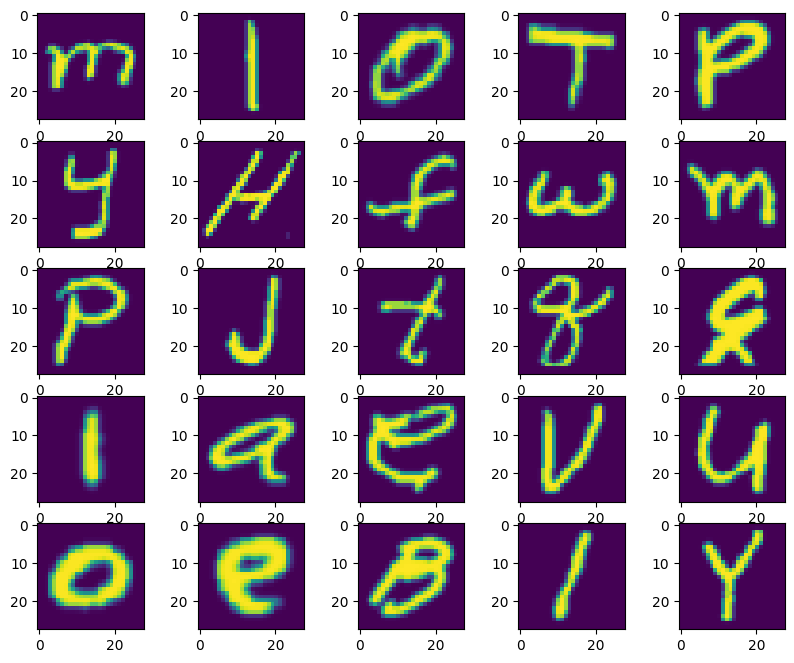

In [14]:
img_size = 28
x1 = np.array(train_data.iloc[:,1:].values)
indices = np.arange(len(x1))
np.random.shuffle(indices)
fig,axes = plt.subplots(5,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    img = x1[indices[i]].reshape([img_size, img_size])
    image = np.fliplr(img)
    image = np.rot90(image)
    ax.imshow(image)

In [26]:
row_num = 4
num_classes = len(train_data[0].unique())
num_classes

26

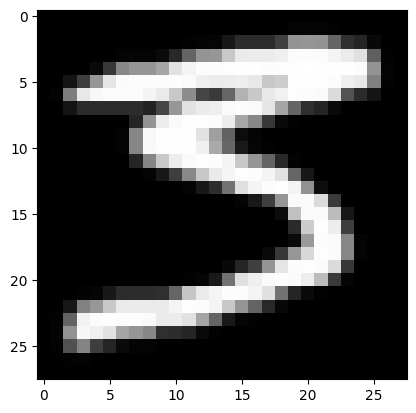

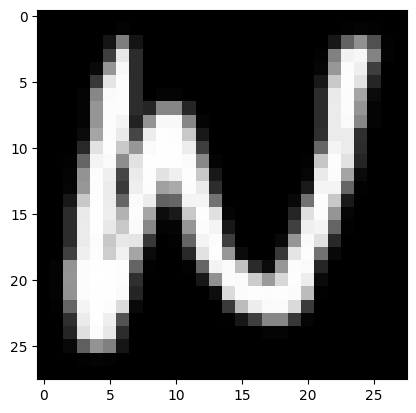

In [20]:
plt.imshow(train_data.values[row_num, 1:].reshape([img_size, img_size]), cmap='Greys_r')
plt.show()

img_flip = np.transpose(train_data.values[row_num,1:].reshape(img_size, img_size), axes=[1,0]) # img_size * img_size arrays
#img_flip = np.rot90(train_data.values[row_num,1:].reshape(img_size, img_size), axes=[1,0])
plt.imshow(img_flip, cmap='Greys_r')

plt.show()

In [21]:
def show_img(data, row_num):
    img_flip = np.transpose(data.values[row_num,1:].reshape(img_size, img_size), axes=[1,0]) # img_size * img_size arrays
    plt.title('Class: ' + str(data.values[row_num,0]) + ', Label: ' + str(class_mapping[data.values[row_num,0]]))
    plt.imshow(img_flip, cmap='Greys_r')

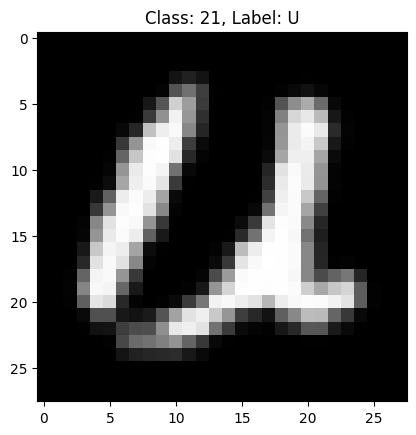

In [22]:
show_img(train_data, 149)

### model, compile

In [23]:
model = keras.models.Sequential()

# model.add(keras.layers.Reshape((img_size,img_size,1), input_shape=(784,)))
model.add(keras.layers.Conv2D(filters=12, kernel_size=(5,5), strides=2, activation='relu',
                              input_shape=(img_size,img_size,1)))
# model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(.5))

model.add(keras.layers.Conv2D(filters=18, kernel_size=(3,3) , strides=2, activation='relu'))
# model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(.5))

model.add(keras.layers.Conv2D(filters=24, kernel_size=(2,2), activation='relu'))
# model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

# model.add(keras.layers.Conv2D(filters=30, kernel_size=(3,3), activation='relu'))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=150, activation='relu'))
model.add(keras.layers.Dense(units=len(class_mapping), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 12, 12, 12)        312       
                                                                 
 dropout (Dropout)           (None, 12, 12, 12)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 18)          1962      
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 18)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 24)          1752      
                                                                 
 flatten (Flatten)           (None, 384)               0         
                                                                 
 dense (Dense)               (None, 150)               5

In [24]:
for layer in model.layers:
    print(layer.get_output_at(0).get_shape().as_list())


[None, 12, 12, 12]
[None, 12, 12, 12]
[None, 5, 5, 18]
[None, 5, 5, 18]
[None, 4, 4, 24]
[None, 384]
[None, 150]
[None, 27]


### Train

In [25]:
num_classes = len(class_mapping)
img_size = 28

data = pd.read_csv(train_data_path, header=None)
data_rows = len(data)
if not num_classes:
    num_classes = len(data[0].unique())

# this assumes square imgs. Should be 28x28
img_size = int(np.sqrt(len(data.iloc[0][1:])))

# Images need to be transposed. This line also does the reshaping needed.
imgs = np.transpose(data.values[:,1:].reshape(data_rows, img_size, img_size, 1), axes=[0,2,1,3]) # img_size * img_size arrays

labels = keras.utils.to_categorical(data.values[:,0]) # one-hot encoding vectors

X, y = imgs/255., labels
print(X.shape)

(88800, 28, 28, 1)


In [26]:
data_generator = keras.preprocessing.image.ImageDataGenerator(validation_split=.2)
## consider using this for more variety
data_generator_with_aug = keras.preprocessing.image.ImageDataGenerator(validation_split=.2,
                                            width_shift_range=.2, height_shift_range=.2,
                                            rotation_range=60, zoom_range=.2, shear_range=.3)

# if already ran this above, no need to do it again
# X, y = img_label_load(train_data_path)
# print("X.shape: ", X.shape)

training_data_generator = data_generator.flow(X, y, subset='training')
validation_data_generator = data_generator.flow(X, y, subset='validation')
history = model.fit_generator(training_data_generator,
                              steps_per_epoch=500, epochs=5, # can change epochs to 10
                              validation_data=validation_data_generator)


<ipython-input-26-b387decadc61>:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(training_data_generator,


Epoch 1/5
500/500 [==============================] - 13s 22ms/step - loss: 1.9027 - accuracy: 0.4421 - val_loss: 1.0455 - val_accuracy: 0.6806
Epoch 2/5
500/500 [==============================] - 11s 22ms/step - loss: 1.0657 - accuracy: 0.6687 - val_loss: 0.7187 - val_accuracy: 0.7742
Epoch 3/5
500/500 [==============================] - 16s 32ms/step - loss: 0.8557 - accuracy: 0.7312 - val_loss: 0.5774 - val_accuracy: 0.8200
Epoch 4/5
500/500 [==============================] - 10s 21ms/step - loss: 0.7543 - accuracy: 0.7677 - val_loss: 0.5320 - val_accuracy: 0.8282
Epoch 5/5
500/500 [==============================] - 12s 23ms/step - loss: 0.6647 - accuracy: 0.7903 - val_loss: 0.4900 - val_accuracy: 0.8426


In [27]:
num_classes = len(class_mapping)

data = pd.read_csv(test_data_path, header=None)
data_rows = len(data)
if not num_classes:
    num_classes = len(data[0].unique())

# this assumes square imgs. Should be 28x28
img_size = int(np.sqrt(len(data.iloc[0][1:])))

# Images need to be transposed. This line also does the reshaping needed.
imgs = np.transpose(data.values[:,1:].reshape(data_rows, img_size, img_size, 1), axes=[0,2,1,3]) # img_size * img_size arrays

labels = keras.utils.to_categorical(data.values[:,0], num_classes) # one-hot encoding vectors

test_X, test_y = imgs/255., labels
test_data_generator = data_generator.flow(X, y)

model.evaluate_generator(test_data_generator)

<ipython-input-27-434a6651e182>:19: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_data_generator)


[0.47828805446624756, 0.8454842567443848]

## Look at some predictions


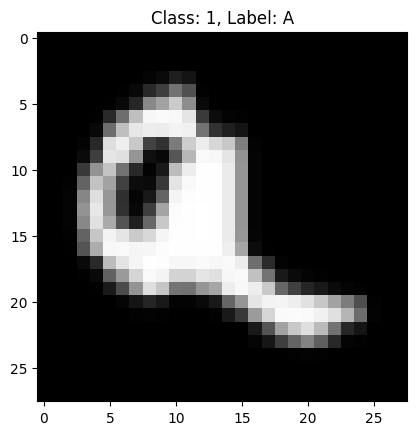

In [28]:
test_data = pd.read_csv(test_data_path, header=None)
show_img(test_data, 123)

In [29]:
num_classes = len(class_mapping)
img_size = 28

data = pd.read_csv(test_data_path, header=None)
data_rows = len(data)
if not num_classes:
    num_classes = len(data[0].unique())

# this assumes square imgs. Should be 28x28
img_size = int(np.sqrt(len(data.iloc[0][1:])))

# Images need to be transposed. This line also does the reshaping needed.
imgs = np.transpose(data.values[:,1:].reshape(data_rows, img_size, img_size, 1), axes=[0,2,1,3]) # img_size * img_size arrays

labels = keras.utils.to_categorical(data.values[:,0], num_classes) # one-hot encoding vectors

X_test, y_test = imgs/255., labels

In [30]:
def run_prediction(idx):
    result = np.argmax(model.predict(X_test[idx:idx+1]))
    print('Prediction: ', result, ', Char: ', class_mapping[result])
    print('Label: ', test_data.values[idx,0])
    show_img(test_data, idx)

1/1 [==============================] - 0s 128ms/step
Prediction:  12 , Char:  L
Label:  9
1/1 [==============================] - 0s 28ms/step
Prediction:  12 , Char:  L
Label:  9
1/1 [==============================] - 0s 41ms/step
Prediction:  17 , Char:  Q
Label:  7
1/1 [==============================] - 0s 22ms/step
Prediction:  10 , Char:  J
Label:  10
1/1 [==============================] - 0s 23ms/step
Prediction:  9 , Char:  I
Label:  9
1/1 [==============================] - 0s 31ms/step
Prediction:  4 , Char:  D
Label:  4
1/1 [==============================] - 0s 23ms/step
Prediction:  5 , Char:  E
Label:  5
1/1 [==============================] - 0s 44ms/step
Prediction:  2 , Char:  B
Label:  2
1/1 [==============================] - 0s 28ms/step
Prediction:  7 , Char:  G
Label:  7
1/1 [==============================] - 0s 30ms/step
Prediction:  6 , Char:  F
Label:  6
1/1 [==============================] - 0s 25ms/step
Prediction:  2 , Char:  B
Label:  2
1/1 [=====================

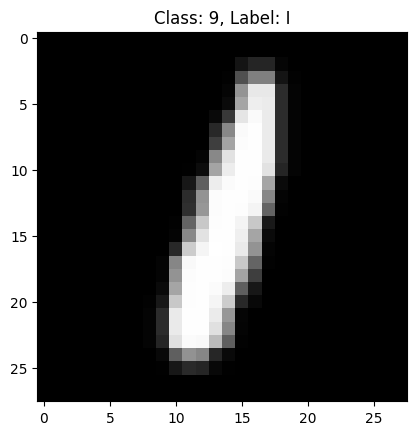

In [31]:
import random

for _ in range(1,15):
    idx = random.randint(0, 8000)
    run_prediction(idx)

1

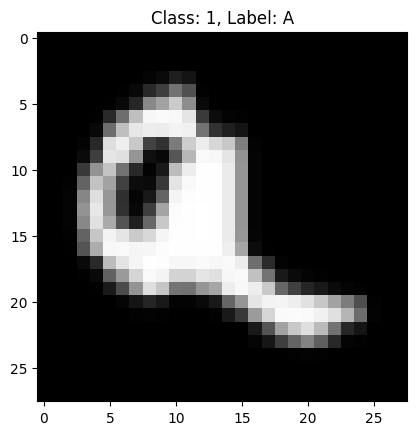

In [32]:
show_img(test_data, 123)
np.argmax(y_test[123])

## Export model to TF SavedModel for CMLE Prediction
https://www.tensorflow.org/api_docs/python/tf/keras/estimator/model_to_estimator

In [ ]:
# First, convert Keras Model to TensorFlow Estimator
model_input_name = model.input_names[0]
estimator_model = keras.estimator.model_to_estimator(keras_model=model, model_dir="./estimator_model")
print(model_input_name)

conv2d_input


In [ ]:
# Next, export the TensorFlow Estimator to SavedModel

from functools import partial
import tensorflow as tf

def serving_input_receiver_fn():
    input_ph = tf.placeholder(tf.string, shape=[None], name='image_binary')
    images = tf.map_fn(partial(tf.image.decode_image, channels=1), input_ph, dtype=tf.uint8)
    images = tf.cast(images, tf.float32) / 255.
    images.set_shape([None, 28, 28, 1])

    # the first key is the name of first layer of the (keras) model.
    # The second key is the name of the key that will be passed in the prediction request
    return tf.estimator.export.ServingInputReceiver({model_input_name: images}, {'bytes': input_ph})

In [ ]:
export_path = estimator_model.export_savedmodel('./export', serving_input_receiver_fn=serving_input_receiver_fn)
export_path

b'./export/1695417128'

## Keras exports

In [ ]:
with open('model.json', 'w') as f:
    f.write(model.to_json())
model.save_weights('./model.h5')

model.save('./CNN_model_2_EMNIST.h5')
!ls -lh

total 1.2M
-rw-r--r-- 1 root root 811K Sep 22 21:12 CNN_model_2_EMNIST.h5
---------- 1 root root  21K Sep 22 21:10 __notebook__.ipynb
drwxr-xr-x 2 root root 4.0K Sep 22 21:12 estimator_model
drwxr-xr-x 3 root root 4.0K Sep 22 21:12 export
-rw-r--r-- 1 root root 281K Sep 22 21:12 model.h5
-rw-r--r-- 1 root root 3.5K Sep 22 21:12 model.json


## Plot loss and accuracy

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


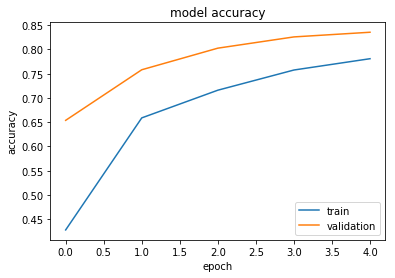

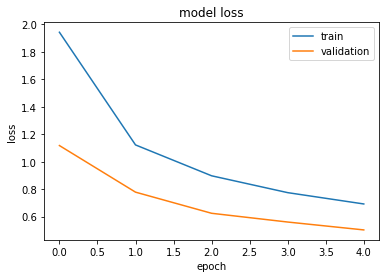

In [ ]:
import matplotlib.pyplot as plt

print(history.history.keys())

# accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Hyperparameter Tuning: Experiment with different hyperparameters such as the number of layers, filter sizes, dropout rates, and learning rates to optimize the model's performance.

Model Architecture: Explore different CNN architectures like VGG, ResNet, or Inception to see if they perform better on the dataset.

Data Augmentation: You can further enhance data augmentation by applying additional transformations or using more sophisticated techniques like generative adversarial networks (GANs).

Transfer Learning: Consider using pre-trained models (e.g., from ImageNet) as a starting point and fine-tuning them on the EMNIST dataset. This can potentially boost performance, especially if you have a limited amount of training data.

Ensemble Models: Train multiple models with different architectures and combine their predictions to improv`e accuracy.

Regularization: Implement techniques like L1 and L2 regularization to prevent overfitting.

Learning Rate Scheduling: Experiment with learning rate scheduling to find the optimal learning rate during training.

Advanced Visualization: Enhance the visualization by showing more details about the model's performance, such as confusion matrices and class-wise accuracy.

Interactive Web App: Develop an interactive web application where users can draw characters, and the model will predict what they've drawn in real-time.

Explainability: Explore techniques for model explainability to understand why the model made certain predictions.

Deployment: Deploy the trained model as a web service or mobile app for practical use.